[Article](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
# Parameters in XGBoost
**参数分为3类**：
1. **General Parameters**: Guide the overall functioning  
2. **Booster Parameters**: Guide the individual booster (tree/regerssion) at each step
3. **Learning Task Parameters**: Guide the optimization performed

**General Parameters**
These define the overall functionality of XGBoost.
1. **booster [default=gbtree]**
    - Select the type model to run at each iteration. Two options:
        * gbtree: tree-based models
        * gblinear: linear models  
2. **silent [default=0]**  
    - Silent mode is activated is set to 1, i.e. no runing messages will be printed  
    - **It is generally good to keep it 0, as the messages might help in understanding the model.** 
3. **nthread [default to maximum number of threads available if not set]**

**Booster Parameters** (tree booster)
1. **eta [default=0.3]**
    - 类似于GBM中的学习率
    - 通过减少每一迭代步的权重（学习率）使得模型更加鲁棒
    - 经验最佳取值范围[0.01,0.2]
2. **min_child_weight [default=1]**
    - 限定叶子节点中所划分到的各样本权值和的最小值
    - 类似于GBM中参数min_child_leaf. 但XGBoost中指的是叶子节点中样本的权重和，GBM中指的是叶子节点中最小样本数量
    - 用于控制过拟合,取值增大过拟合可能性降低; 取值过大，会导致欠拟合. 通过CV获取最佳参数
3. **max_depth [defalut=6]**
    - 树的最大深度
    - 用于控制过拟合，取值增大过拟合可能性降低
    - 通过CV获取最佳参数. 经验最佳取值3-10
4. **max_leaf_nodes**
    - 树的最大叶节点数量
    - 可与参数max_depth相互替代（给定二叉树深度n, 叶节点数目为$2^n$)
    - 定义最大叶节点数参数,XGBoost将会忽略最大深度参数
5. **gamma [default=0]**
    - 在树的某节点处是否对数据进行划分的基本准则是划分后损失函数减小, 而gamma规定了划分后损失函数的最小减小量
    - 该参数使得模型趋于保守. 参数值的变化依赖于特定的损失函数.
6. **max_delta_step [default=0]**
    - In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative
    - 通常这个参数不必设置, 但采用logistic regression处理类别极不平衡分类问题时,该参数可能有用
    - [ ] 不太懂???
7. **subsample [default=1]**
    - 用于每一个棵树训练的随机子样本数量
    - 较小值使模型更保守，防止过拟合;过小导致欠拟合
    - 经验最佳取值: 0.5-1
8. **colsample_bytree [default=1]**
    - 用于每一个树训练的最大特征子集
    - 经验最佳取值: 0.5-1
9. **colsample_bylevel [default=1]**
    - 用于树分支节点划分数据集的备选特征子集
    - 不常使用，因为subsample, colsample_bytree参数包含此功能
10. **lambda [default=1]**
    - L2正则化参数
    - 许多数据科学家不调节该参数
11. **alpha [default=0]**
    - L1正则化参数
    - 在特征维度很高时使用，可以加快算法的运行速度
12. **scale_pos_weight [default=1]**
    - 在类别不平衡问题中使用，可能会加快算法的收敛
13. **num_boosting_rounds**
    - 定义树的棵树
    
**Learning Task Parameters**  
通常定义优化目标函数
1. **objective [default=reg:linear]**
    - 定义损失函数,常用的参数：
        * **binary:logistic** -logistic regression for binary classification, return **predicted probability** (not class)
        * **multi:softmax** -multiclass classification using the softmax objective, returns **predicted class** (not probabilities)
            - 还要设置类别数num_class
        * **multi:softprob** -same as softmax, but returns predicted probability of each sample belonging to each class
2. **eval_metric [default according to objective]**
    - 用于学习算法评估的测量函数
    - 对于回归问题默认为rmse,对于分类问题默认为错分类error
    - 可以设置为：
        * **rmse** -root mean square error
        * **mae** -mean absolute error
        * **logloss** -negative log-likehood
        * **error** - binary classification error rate
        * **merror** - multiclass classification error rate
        * **mlogloss** -muliclass logloss
        * **auc** -area under the curve
3. **seed [default=0]**  
    -随机种子，用于产生可重复的结果
    
**xgboost module in python has an sklearn wrapper: XGBClassifier.**  
参数名称对应为：  
1. eta -> learing_rate
2. lambda -> reg_lambda
3. alpha -> reg_alpha

详细说明可进一步参考：   
[XGBoost Parameters (official guide)](http://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters)  
[XGBoost Demo Codes (xgboost GitHub repository)](https://github.com/dmlc/xgboost/tree/master/demo/guide-python)  
[Python API Reference (official guide)](http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)  

#  Fruad Detection
>**[Problem](https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802)**:  
Digital arms of banks today face challenges with lead conversion, they source leads through mediums like search, display, email campaigns and via affiliate partners. Here Happy Customer Bank faces same challenge of low conversion ratio. They have given a problem to identify the customers segments having higher conversion ratio for a specific loan product so that they can specifically target these customers, here they have provided a partial data set for salaried customers only from the last 3 months. They also capture basic details about customers like gender, DOB, existing EMI, employer Name, Loan Amount Required, Monthly Income, City, Interaction data and many others. Let’s look at the process at Happy Customer Bank.
<img src="./images/Process_at_Happy_Customer_Bank.png" />
In above process, customer applications can drop majorly at two stages, at login and approval/ rejection by bank. Here we need to identify the segment of customers having higher disbursal rate in next 30 days.  

>**Data Set**  
We have train and test data set, train data set has both input and output variable(s). Need to predict probability of disbursal for test data set.  

>**Input variables**:  
ID -	Unique ID (can not be used for predictions)  
Gender-	Sex  
City -	Current City  
Monthly_Income - Monthly Income in rupees  
DOB -	Date of Birth  
Lead_Creation_Date -	Lead Created on date  
Loan_Amount_Applied -	Loan Amount Requested (INR)  
Loan_Tenure_Applied -	Loan Tenure Requested (in years)  
Existing_EMI -	EMI of Existing Loans (INR)  
Employer_Name - Employer Name  
Salary_Account- Salary account with Bank  
Mobile_Verified - Mobile Verified (Y/N)  
Var5- Continuous classified variable  
Var1- Categorical variable with multiple levels  
Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility  
Loan_Tenure_Submitted-	Loan Tenure Revised and Selected after seeing Eligibility (Years)  
Interest_Rate-	Interest Rate of Submitted Loan Amount  
Processing_Fee- Processing Fee of Submitted Loan Amount (INR)  
EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)  
Filled_Form- Filled Application form post quote   
Device_Type- Device from which application was made (Browser/ Mobile)  
Var2- Categorical Variable with multiple Levels  
Source-	Categorical Variable with multiple Levels  
Var4-	Categorical Variable with multiple Levels  

>**Outcomes**:  
LoggedIn-	Application Logged (Variable for understanding the problem – cannot be used in prediction)  
Disbursed-	Loan Disbursed (Target Variable)  

>**Evaluation Cirteria**:  
Evaluation metrics of this challenge is ROC_AUC. 

## Import libraries

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

# 为显示中文
from pylab import *  
mpl.rcParams['font.sans-serif'] = ['SimHei']

D:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Program Files\Anaconda\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Load data

In [139]:
df_train_test = pd.read_csv('df_data_train_clean_sparse.csv',index_col='个人编码').fillna(0)

In [140]:
features = df_train_test.columns.difference(['target'])

In [141]:
features.size

797

### Sparse Predictors and Data

Sparse 特征包括every_period_30以上，去各个医院的频率，到各个医院的交易频率三类特征

In [142]:
non_sparse_features = pd.read_csv('df_data_train_clean.csv',index_col='个人编码').fillna(0).columns.difference(['target'])

In [143]:
non_sparse_features[non_sparse_features.str.startswith('every_perio')]

Index([u'every_period_0', u'every_period_1', u'every_period_10',
       u'every_period_11', u'every_period_12', u'every_period_13',
       u'every_period_14', u'every_period_15', u'every_period_16',
       u'every_period_17', u'every_period_18', u'every_period_19',
       u'every_period_2', u'every_period_20', u'every_period_21',
       u'every_period_22', u'every_period_23', u'every_period_24',
       u'every_period_25', u'every_period_26', u'every_period_27',
       u'every_period_28', u'every_period_29', u'every_period_3',
       u'every_period_30', u'every_period_4', u'every_period_5',
       u'every_period_6', u'every_period_7', u'every_period_8',
       u'every_period_9', u'every_periods_31plus'],
      dtype='object')

In [144]:
features.difference(non_sparse_features)

Index([u'every_period_0.1', u'every_period_1.1', u'every_period_10.1',
       u'every_period_102', u'every_period_107', u'every_period_11.1',
       u'every_period_116', u'every_period_119', u'every_period_12.1',
       u'every_period_120',
       ...
       u'freq_hospital_932', u'freq_hospital_934', u'freq_hospital_935',
       u'freq_hospital_938', u'freq_hospital_941', u'freq_hospital_942',
       u'freq_hospital_95', u'freq_hospital_963', u'freq_hospital_97',
       u'freq_hospital_98'],
      dtype='object', length=444)

### Drop Duplicated Columns
- df = df.T.drop_duplicates().T；当数据量大时not work
- [自定义函数dulicate_columns(df)](https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns) 
    * step 1：dups = duplicate_columns(df)
    * step 2：df = df.drop(dups, axis=1)
- 去除重复的列名的列df = df.loc[:,~df.columns.duplicated()]

In [145]:
# 去除重复的列
def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        dcols = frame[v].to_dict(orient="list")

        vs = dcols.values()
        ks = dcols.keys()
        lvs = len(vs)

        for i in range(lvs):
            for j in range(i+1,lvs):
                if vs[i] == vs[j]: 
                    dups.append(ks[i])
                    break

    return dups 

In [146]:
dups = duplicate_columns(df_train_test)

In [148]:
features.difference(dups)

Index([u'day_to_nhospitals', u'dayofweek_0', u'dayofweek_1', u'dayofweek_2',
       u'dayofweek_3', u'dayofweek_4', u'dayofweek_5', u'dayofweek_6',
       u'every_ave_period', u'every_max_period',
       ...
       u'非账户支付金额_q1', u'非账户支付金额_q2', u'非账户支付金额_q3', u'非账户支付金额_std',
       u'非账户支付金额_sum', u'高价材料发生金额_max', u'高价材料发生金额_mean', u'高价材料发生金额_q3',
       u'高价材料发生金额_std', u'高价材料发生金额_sum'],
      dtype='object', length=760)

In [149]:
# Sparse Predictors and data
df_train_test = pd.concat([df_train_test[features.difference(dups).difference(non_sparse_features)],df_train_test['target']],axis=1)

In [153]:
df_train_test = df_train_test[df_train_test.columns.difference(['every_period_2.1', u'every_period_30.1'])]

In [155]:
df_train_test.columns[df_train_test.columns.str.startswith('every_')]

Index([u'every_period_102', u'every_period_107', u'every_period_116',
       u'every_period_119', u'every_period_120', u'every_period_127',
       u'every_period_141', u'every_period_31', u'every_period_32',
       u'every_period_33', u'every_period_34', u'every_period_35',
       u'every_period_36', u'every_period_37', u'every_period_38',
       u'every_period_39', u'every_period_40', u'every_period_41',
       u'every_period_42', u'every_period_43', u'every_period_44',
       u'every_period_45', u'every_period_46', u'every_period_47',
       u'every_period_48', u'every_period_49', u'every_period_50',
       u'every_period_51', u'every_period_52', u'every_period_53',
       u'every_period_54', u'every_period_55', u'every_period_56',
       u'every_period_57', u'every_period_58', u'every_period_59',
       u'every_period_60', u'every_period_61', u'every_period_62',
       u'every_period_63', u'every_period_64', u'every_period_65',
       u'every_period_66', u'every_period_67', u'every_

### Data Cleaning

In [156]:
predictors = df_train_test.columns.difference(['target'])
predictors_std = df_train_test[predictors].std()
# std 为0的特征（去除）
zero_std_predictors = predictors_std[predictors_std == 0].index
df_train_test = df_train_test.drop(zero_std_predictors,axis=1)
df_train_test.shape

(20000, 414)

### Sparse Predictors

In [157]:
predictors = df_train_test.columns.difference(['target','first_time'])
target = 'target'

In [49]:
df_train_test['target'].value_counts()

0    19000
1     1000
Name: target, dtype: int64

## Spliting training and testing set

In [158]:
from sklearn.model_selection import StratifiedShuffleSplit
ss = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=0)
idx_train, idx_test = ss.split(df_train_test[predictors],df_train_test[target]).next()
print 'train: ',len(idx_train)
print 'test: ',len(idx_test)
print 'ratio',float(len(idx_test))/(len(idx_train)+len(idx_test))

train:  16000
test:  4000
ratio 0.2


In [159]:
df_train = df_train_test.iloc[idx_train,:]
df_test = df_train_test.iloc[idx_test,:]

## Define a function for modeling and cross-validation

In [160]:
def modelfit(alg, dtrain, dtest, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    '''  '''
    if useTrainCV:  # 使用交叉验证选取最佳树棵树
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],\
                          nfold=cv_folds,metrics='auc',early_stopping_rounds=early_stopping_rounds,verbose_eval=10)
        alg.set_params(n_estimators=cvresult.shape[0])

        
    # fit the algorithm on the data:
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
    
    # predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    # print model report:
    print "\nModel Report"
    print 'n_estimators: ',cvresult.shape[0]
    print "Training:"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain[target], dtrain_predictions)
    print "F1 Score : %f" % metrics.f1_score(dtrain[target],dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target],dtrain_predprob)
    print "Classification Report : \n", metrics.classification_report(dtrain[target],dtrain_predictions)
    print ""
    
    # predict on testing data:
    print "Testing: "
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
    #results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print "Accuracy : %.4g" % metrics.accuracy_score(dtest[target], dtest_predictions)
    print "F1 Score : %f" % metrics.f1_score(dtest[target],dtest_predictions)
    print 'AUC Score (Test): %f' % metrics.roc_auc_score(dtest[target], dtest_predprob)
    print "Classification Report : \n", metrics.classification_report(dtest[target],dtest_predictions)
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp[0:60].plot(kind='bar', title='Feature Importance')
    plt.ylabel('Feature Importance Score')
    
    return feat_imp

## Step 1-Find the number of estimators for a high learning rate
**General Approach for Parameter Tuning**  
- **step 1**: 选择一个相对较大的学习率learning_rate. 通常选取0.1，或者在0.05-0.3间. 在给定学习率下，通过xgboost提供的cv函数确定最优的树的数量
- **step 2**: 在给定学习率，数的棵树下，调节关于树的参数(max_depth, min_child_weight, gamma, subsample, colsample_bytree)
- **step 3**：然后，调节正则化参数(lambda,alpha),以减小模型复杂度、提高性能
- **step 4**：减小学习率，确定最优参数

[0]	train-auc:0.548991+0.00782998	test-auc:0.532421+0.00427864
[10]	train-auc:0.660665+0.00416788	test-auc:0.631621+0.020043
[20]	train-auc:0.693295+0.00416718	test-auc:0.656423+0.0181108
[30]	train-auc:0.726994+0.0076397	test-auc:0.671597+0.0100745
[40]	train-auc:0.753482+0.00544797	test-auc:0.686407+0.01061
[50]	train-auc:0.772509+0.00221464	test-auc:0.695966+0.0108821
[60]	train-auc:0.786358+0.00555838	test-auc:0.696508+0.00928373
[70]	train-auc:0.799817+0.00558702	test-auc:0.69952+0.0108028
[80]	train-auc:0.810279+0.00388714	test-auc:0.702506+0.0115011
[90]	train-auc:0.818006+0.00260728	test-auc:0.70469+0.014277
[100]	train-auc:0.82577+0.00364082	test-auc:0.710696+0.0146012
[110]	train-auc:0.831004+0.00370887	test-auc:0.712763+0.0155674
[120]	train-auc:0.836617+0.00359472	test-auc:0.714868+0.0162335
[130]	train-auc:0.841075+0.00356436	test-auc:0.715614+0.0152081
[140]	train-auc:0.845127+0.00275346	test-auc:0.71732+0.0161821
[150]	train-auc:0.848806+0.00257865	test-auc:0.717889+0.01

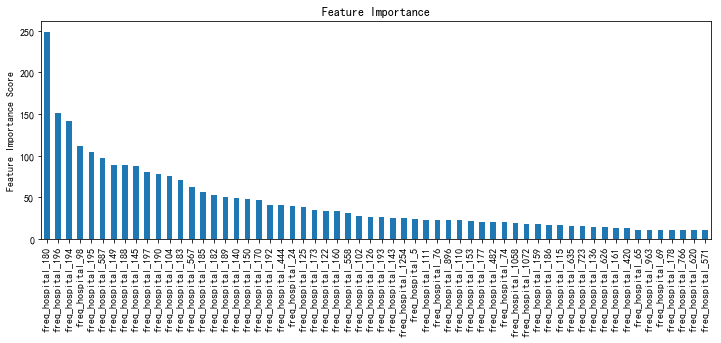

In [161]:
# choose all predictors except target & IDcols
# predictors = [x for x in train.columns if x not in [target]]
xgb1 = XGBClassifier(learning_rate = 0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.9,
                    colsample_bytree=0.9,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)
feat_imp = modelfit(xgb1,df_train,df_test,predictors)

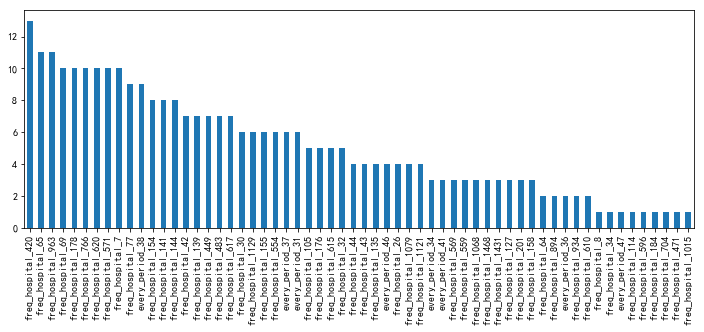

In [162]:
feat_imp[-60:].plot(kind='bar')

## step 2-Tune max_depth and min_child_weight

In [ ]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=265, max_depth=5,
                                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])

In [13]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.90992, std: 0.01171, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.90811, std: 0.01250, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.90805, std: 0.01181, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.91300, std: 0.01061, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.91235, std: 0.01124, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.91334, std: 0.01047, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.91356, std: 0.00851, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.91273, std: 0.01146, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.91512, std: 0.01086, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.91418, std: 0.00938, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.91050, std: 0.01176, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.91279, std: 0.00974, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 5

In [16]:
#Grid seach on subsample and max_features
#Choose all predictors except target & IDcols
param_test2 = {
    'max_depth':[6,7,8],
    'min_child_weight':[4,5,6] 
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=110, max_depth=5,
                                        min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df_train[predictors],df_train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=2, missing=None, n_estimators=110, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [6, 7, 8], 'min_child_weight': [4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [17]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.91345, std: 0.01278, params: {'max_depth': 6, 'min_child_weight': 4},
  mean: 0.91239, std: 0.01110, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.91483, std: 0.00929, params: {'max_depth': 6, 'min_child_weight': 6},
  mean: 0.91460, std: 0.00945, params: {'max_depth': 7, 'min_child_weight': 4},
  mean: 0.91512, std: 0.01086, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.91448, std: 0.00960, params: {'max_depth': 7, 'min_child_weight': 6},
  mean: 0.91615, std: 0.00929, params: {'max_depth': 8, 'min_child_weight': 4},
  mean: 0.91352, std: 0.00849, params: {'max_depth': 8, 'min_child_weight': 5},
  mean: 0.91352, std: 0.01174, params: {'max_depth': 8, 'min_child_weight': 6}],
 {'max_depth': 8, 'min_child_weight': 4},
 0.9161533717105262)

## step 3-Tune gamma

In [18]:
#'gamma':[i/10.0 for i in range(0,2)]
param_test3 = {
 'gamma':[0,0.05,0.1]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=110, max_depth=8,
                                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df_train[predictors],df_train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=8,
       min_child_weight=4, missing=None, n_estimators=110, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'gamma': [0, 0.05, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [19]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.91615, std: 0.00929, params: {'gamma': 0},
  mean: 0.91523, std: 0.01019, params: {'gamma': 0.05},
  mean: 0.91701, std: 0.01140, params: {'gamma': 0.1}],
 {'gamma': 0.1},
 0.9170143914473684)

In [20]:
#'gamma':[i/10.0 for i in range(0,2)]
param_test3b = {
 'gamma':[0.1,0.15,0.2]
}
gsearch3b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=110, max_depth=8,
                                        min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3b.fit(df_train[predictors],df_train[target])
gsearch3b.grid_scores_, gsearch3b.best_params_, gsearch3b.best_score_

([mean: 0.91701, std: 0.01140, params: {'gamma': 0.1},
  mean: 0.91522, std: 0.01047, params: {'gamma': 0.15},
  mean: 0.91303, std: 0.00925, params: {'gamma': 0.2}],
 {'gamma': 0.1},
 0.9170143914473684)

[0]	train-auc:0.852251+0.0132401	test-auc:0.80892+0.0298528
[10]	train-auc:0.943573+0.00321037	test-auc:0.882565+0.0130454
[20]	train-auc:0.970305+0.00284899	test-auc:0.897077+0.0101041
[30]	train-auc:0.982632+0.00111647	test-auc:0.906225+0.00937864
[40]	train-auc:0.990436+0.000771175	test-auc:0.911092+0.00782767
[50]	train-auc:0.994755+0.00034379	test-auc:0.912635+0.00755735
[60]	train-auc:0.997123+0.000261251	test-auc:0.913497+0.00624337
[70]	train-auc:0.998425+0.000209796	test-auc:0.913824+0.00564253
[80]	train-auc:0.999187+0.000216432	test-auc:0.912574+0.00594892
[90]	train-auc:0.999596+0.000134852	test-auc:0.912892+0.00510949
[100]	train-auc:0.999815+8.04562e-05	test-auc:0.912273+0.00614257
[110]	train-auc:0.999911+5.18482e-05	test-auc:0.911704+0.00591394

Model Report
n_estimators:  68
Training:
Accuracy : 0.9838
F1 Score : 0.807148
AUC Score (Train): 0.997640
Classification Report : 
             precision    recall  f1-score   support

          0       0.98      1.00      0.99

trans_stat_sum          88
total_trans_rate        69
every_ave_period        64
total_period            59
起付标准以上自负比例金额_max        59
every_max_period        55
every_q3_period         52
中成药费发生金额_max            49
freq_to_hospital_max    45
三目统计项目_std              43
trans_stat_mean         42
trans_stat_q3           40
num_total_hospitals     40
last_time               37
trans_stat_std          37
三目统计项目_sum              35
total_rate              33
fee_zifei_mean          33
药品费自费金额_std             33
中成药费发生金额_sum            32
trans_stat_max          32
非账户支付金额_max             30
基本医疗保险统筹基金支付金额_q3       30
起付标准以上自负比例金额_sum        30
药品费自费金额_max             29
基本医疗保险统筹基金支付金额_max      27
药品费发生金额_max             27
起付标准以上自负比例金额_q1         27
中成药费发生金额_std            27
药品费发生金额_sum             27
                        ..
其它发生金额_max               1
床位费发生金额_std              1
床位费发生金额_mean             1
贵重药品发生金额_q3              1
治疗费申报金额_q2               1
医用材料发生金额_q1              1
民

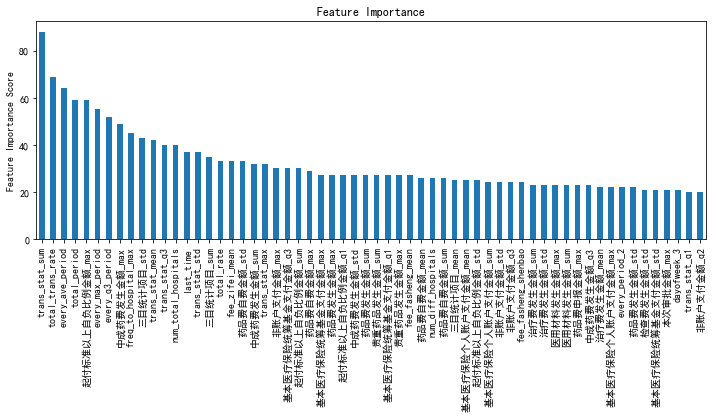

In [21]:
# Re-calibrate the number of boosting rounds for the updated parameters
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, df_train, df_test,predictors)

Here, we can not see the improvement in score. So the final parameters are:

max_depth: 4
min_child_weight: 3
gamma: 0

## Tune subsample and colsample_bytree

In [22]:
param_test4 = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=68, max_depth=8,
 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df_train[predictors],df_train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.91171, std: 0.01088, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.91523, std: 0.01364, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.91532, std: 0.01111, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.91442, std: 0.01102, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.91682, std: 0.01083, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.91522, std: 0.01094, params: {'subsample': 0.9, 'colsample_bytree': 0.8},
  mean: 0.91327, std: 0.01170, params: {'subsample': 0.7, 'colsample_bytree': 0.9},
  mean: 0.91487, std: 0.01101, params: {'subsample': 0.8, 'colsample_bytree': 0.9},
  mean: 0.91336, std: 0.01270, params: {'subsample': 0.9, 'colsample_bytree': 0.9}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 0.9168215460526316)

In [21]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=97, max_depth=8,
 min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df_train[predictors],df_train[target])
gsearch5.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.91444, std: 0.01017, params: {'subsample': 0.75, 'colsample_bytree': 0.75},
  mean: 0.91434, std: 0.01146, params: {'subsample': 0.8, 'colsample_bytree': 0.75},
  mean: 0.91180, std: 0.01267, params: {'subsample': 0.85, 'colsample_bytree': 0.75},
  mean: 0.91338, std: 0.01216, params: {'subsample': 0.75, 'colsample_bytree': 0.8},
  mean: 0.91589, std: 0.00939, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.91400, std: 0.01195, params: {'subsample': 0.85, 'colsample_bytree': 0.8},
  mean: 0.91422, std: 0.00979, params: {'subsample': 0.75, 'colsample_bytree': 0.85},
  mean: 0.91369, std: 0.01178, params: {'subsample': 0.8, 'colsample_bytree': 0.85},
  mean: 0.91165, std: 0.01205, params: {'subsample': 0.85, 'colsample_bytree': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 0.9158910361842105)

## Step 5: Tuning Regularization Parameters

In [23]:
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
param_test6 = {
 'reg_alpha':[0,1e-5, 1e-2, 0.1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=68, max_depth=8,
 min_child_weight=4, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(df_train[predictors],df_train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.91682, std: 0.01083, params: {'reg_alpha': 0},
  mean: 0.91682, std: 0.01083, params: {'reg_alpha': 1e-05},
  mean: 0.91481, std: 0.00877, params: {'reg_alpha': 0.01},
  mean: 0.91507, std: 0.01055, params: {'reg_alpha': 0.1}],
 {'reg_alpha': 0},
 0.9168215460526316)

In [27]:
param_test6 = {
 'reg_alpha':[0,1e-06,1e-05]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=55, max_depth=7,
 min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.9,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(df_train[predictors],df_train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.91402, std: 0.01244, params: {'reg_alpha': 0},
  mean: 0.91402, std: 0.01244, params: {'reg_alpha': 1e-06},
  mean: 0.91402, std: 0.01244, params: {'reg_alpha': 1e-05}],
 {'reg_alpha': 0},
 0.9140180921052631)

[0]	train-auc:0.852251+0.0132401	test-auc:0.80892+0.0298528
[10]	train-auc:0.943573+0.00321037	test-auc:0.882565+0.0130454
[20]	train-auc:0.970305+0.00284899	test-auc:0.897077+0.0101041
[30]	train-auc:0.982632+0.00111647	test-auc:0.906225+0.00937864
[40]	train-auc:0.990436+0.000771175	test-auc:0.911092+0.00782767
[50]	train-auc:0.994755+0.00034379	test-auc:0.912635+0.00755735
[60]	train-auc:0.997123+0.000261251	test-auc:0.913497+0.00624337
[70]	train-auc:0.998425+0.000209796	test-auc:0.913824+0.00564253
[80]	train-auc:0.999187+0.000216432	test-auc:0.912574+0.00594892
[90]	train-auc:0.999596+0.000134852	test-auc:0.912892+0.00510949
[100]	train-auc:0.999815+8.04562e-05	test-auc:0.912273+0.00614257
[110]	train-auc:0.999911+5.18482e-05	test-auc:0.911704+0.00591394

Model Report
n_estimators:  68
Training:
Accuracy : 0.9838
F1 Score : 0.807148
AUC Score (Train): 0.997640
Classification Report : 
             precision    recall  f1-score   support

          0       0.98      1.00      0.99

trans_stat_sum          88
total_trans_rate        69
every_ave_period        64
total_period            59
起付标准以上自负比例金额_max        59
every_max_period        55
every_q3_period         52
中成药费发生金额_max            49
freq_to_hospital_max    45
三目统计项目_std              43
trans_stat_mean         42
trans_stat_q3           40
num_total_hospitals     40
last_time               37
trans_stat_std          37
三目统计项目_sum              35
total_rate              33
fee_zifei_mean          33
药品费自费金额_std             33
中成药费发生金额_sum            32
trans_stat_max          32
非账户支付金额_max             30
基本医疗保险统筹基金支付金额_q3       30
起付标准以上自负比例金额_sum        30
药品费自费金额_max             29
基本医疗保险统筹基金支付金额_max      27
药品费发生金额_max             27
起付标准以上自负比例金额_q1         27
中成药费发生金额_std            27
药品费发生金额_sum             27
                        ..
其它发生金额_max               1
床位费发生金额_std              1
床位费发生金额_mean             1
贵重药品发生金额_q3              1
治疗费申报金额_q2               1
医用材料发生金额_q1              1
民

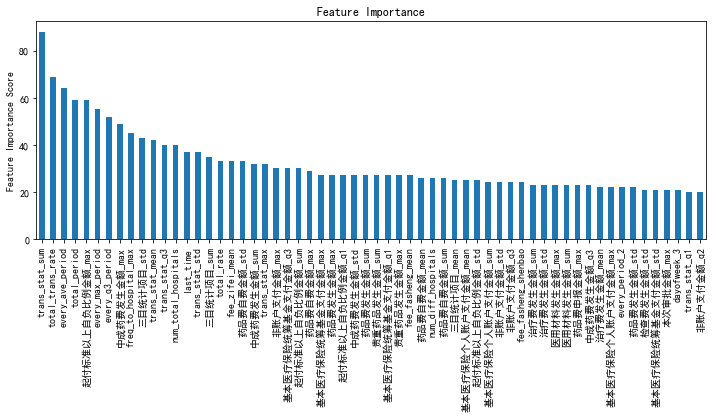

In [24]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=8,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, df_train,df_test, predictors)

方案1  
- ** 最优参数1**  

params = dict(learning_rate =0.1, n_estimators=60, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
- ** 最优参数2** 

params = dict(learning_rate =0.01, n_estimators=725, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

方案2  
- ** 最优参数1**  

XGBClassifier(learning_rate =0.1, n_estimators=97, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
threhold = 0.17

- ** 最优参数2**   

XGBClassifier(learning_rate =0.01, n_estimators=872, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

## Step 6: Reducing Learning Rate

[0]	train-auc:0.852251+0.0132401	test-auc:0.80892+0.0298528
[10]	train-auc:0.911634+0.00736422	test-auc:0.866361+0.0203764
[20]	train-auc:0.922419+0.00458052	test-auc:0.874039+0.0205834
[30]	train-auc:0.927604+0.00452565	test-auc:0.877392+0.0170199
[40]	train-auc:0.93189+0.00378426	test-auc:0.879785+0.0163939
[50]	train-auc:0.934922+0.00430957	test-auc:0.881593+0.0160101
[60]	train-auc:0.938952+0.00408904	test-auc:0.885417+0.0162541
[70]	train-auc:0.942674+0.00481798	test-auc:0.887565+0.0170856
[80]	train-auc:0.946186+0.0042887	test-auc:0.890119+0.0152958
[90]	train-auc:0.949836+0.00413682	test-auc:0.891078+0.0147841
[100]	train-auc:0.95266+0.00384433	test-auc:0.893363+0.0138311
[110]	train-auc:0.955451+0.00351533	test-auc:0.893965+0.014284
[120]	train-auc:0.957737+0.00349767	test-auc:0.896105+0.0134524
[130]	train-auc:0.960365+0.00290598	test-auc:0.897728+0.0121387
[140]	train-auc:0.962651+0.00273597	test-auc:0.899394+0.0113922
[150]	train-auc:0.964592+0.00231308	test-auc:0.899984+0.0

trans_stat_sum          903
total_trans_rate        770
every_ave_period        696
total_period            618
every_q3_period         603
every_max_period        532
起付标准以上自负比例金额_max        491
num_total_hospitals     491
中成药费发生金额_max            477
三目统计项目_sum              448
trans_stat_q3           425
last_time               409
trans_stat_std          408
freq_to_hospital_max    386
三目统计项目_std              376
非账户支付金额_max             371
total_rate              355
中成药费发生金额_sum            331
药品费申报金额_max             323
贵重药品发生金额_max            323
trans_stat_mean         323
三目统计项目_mean             321
药品费自费金额_sum             320
fee_zifei_mean          319
基本医疗保险统筹基金支付金额_q3       313
中成药费发生金额_std            302
药品费发生金额_max             294
trans_stat_max          292
every_period_2          291
起付标准以上自负比例金额_sum        277
                       ... 
every_period_28           2
freq_hospital_193         2
every_period_37           2
医疗救助个人按比例负担金额_q3          2
公务员医疗补助基金支付金额_max   

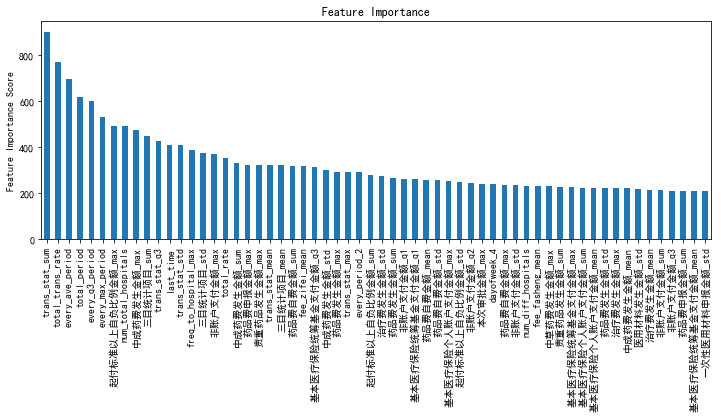

In [25]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=8,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, df_train,df_test, predictors)

# Best Model Analysis

## Training and Prediction

In [41]:
xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=719,
 max_depth=8,
 min_child_weight=4,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(df_train[predictors],df_train[target])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.01, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=872, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

Accuracy : 0.9637
F1 Score : 0.483986
AUC Score (Test): 0.927057
Classification Report : 
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3800
          1       0.84      0.34      0.48       200

avg / total       0.96      0.96      0.96      4000



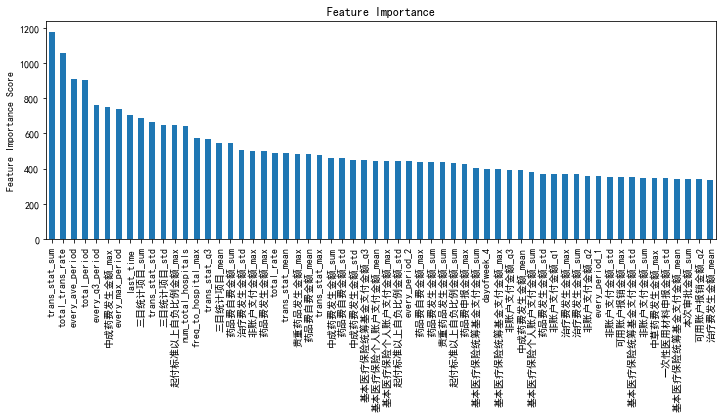

In [42]:
# predict on testing data:
df_test_predictions = xgb.predict(df_test[predictors])
df_test_predprob = xgb.predict_proba(df_test[predictors])[:,1]

print "Accuracy : %.4g" % metrics.accuracy_score(df_test[target], df_test_predictions)
print "F1 Score : %f" % metrics.f1_score(df_test[target],df_test_predictions)
print 'AUC Score (Test): %f' % metrics.roc_auc_score(df_test[target], df_test_predprob)
print "Classification Report : \n", metrics.classification_report(df_test[target],df_test_predictions)

rcParams['figure.figsize'] = 12,4
feat_imp = pd.Series(xgb.booster().get_fscore()).sort_values(ascending=False)
feat_imp[0:60].plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

## Plotting confusion matrix

In [43]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plt.ion()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### On Test Data Set

F1 score:  0.483985765125
Recall metric in testing dataset:  0.34


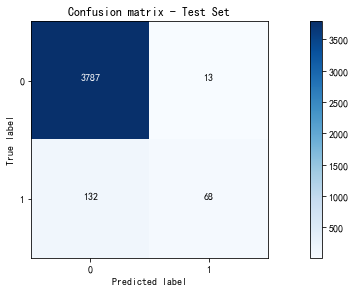

In [44]:
#df_test_predictions = xgb.predict(dtest[predictors])
#df_test_predprob = xgb.predict_proba(dtest[predictors])[:,1]

#y_pred = np.zeros_like(y_pred_proba)
#y_pred[y_pred_proba>0.03] = 1  # 大于0.03预测为正例

print "F1 score: ", metrics.f1_score(df_test[target], df_test_predictions)

# confusion matrix
cnf_matrix = confusion_matrix(df_test[target], df_test_predictions)
np.set_printoptions(precision=2)

print "Recall metric in testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])

# plot non_normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title='Confusion matrix - Test Set')
plt.show()

### On Whole Data Set

F1 score:  0.883131201764
Recall metric in testing dataset:  0.801


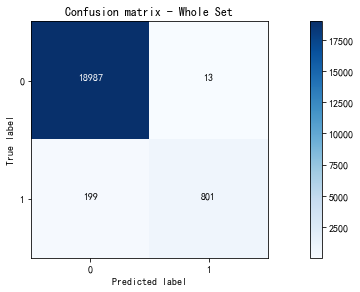

In [45]:
df_train_test_predictions = xgb.predict(df_train_test[predictors])
df_train_test_predprob = xgb.predict_proba(df_train_test[predictors])[:,1]
print "F1 score: ", metrics.f1_score(df_train_test[target], df_train_test_predictions)

# confusion matrix
cnf_matrix = confusion_matrix(df_train_test[target], df_train_test_predictions)
np.set_printoptions(precision=2)

print "Recall metric in testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])

# plot non_normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, title='Confusion matrix - Whole Set')
plt.show()

## ROC curve

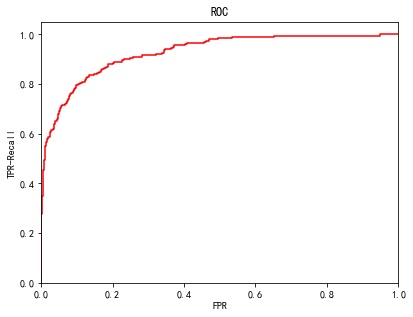

In [46]:
from sklearn.metrics import roc_curve, auc
rcParams['figure.figsize'] = 6.4,4.8
#df_test_predictions = xgb.predict(dtest[predictors])
#df_test_predprob = xgb.predict_proba(dtest[predictors])[:,1]
fpr, tpr, thresholds = roc_curve(df_test[target].values,df_test_predprob)
# Plot Precision-Recall curve
plt.plot(fpr, tpr, color='r')
plt.xlabel('FPR')
plt.ylabel('TPR-Recall')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('ROC')
plt.legend()

## Precision-Recall curve

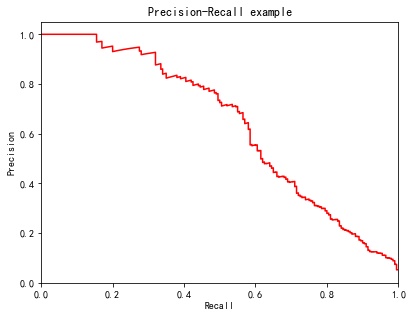

In [47]:
from sklearn.metrics import precision_recall_curve
rcParams['figure.figsize'] = 6.4,4.8
precision, recall, thresholds = precision_recall_curve(df_test[target].values,df_test_predprob)
# Plot Precision-Recall curve
plt.plot(recall, precision, color='r')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall example')
plt.legend()

# Optimization: Changing Threshold

## Precision and Recall

Threshold:  0.1 , F1 score: [ 0.1   0.53  0.  ]
[ 0.05  0.45  1.  ] [ 1.    0.66  0.  ] [False  True]
Threshold:  0.2 , F1 score: [ 0.1   0.61  0.  ]
[ 0.05  0.63  1.  ] [ 1.    0.58  0.  ] [False  True]
Threshold:  0.3 , F1 score: [ 0.1   0.58  0.  ]
[ 0.05  0.77  1.  ] [ 1.    0.47  0.  ] [False  True]
Threshold:  0.4 , F1 score: [ 0.1   0.54  0.  ]
[ 0.05  0.83  1.  ] [ 1.    0.41  0.  ] [False  True]
Threshold:  0.5 , F1 score: [ 0.1   0.48  0.  ]
[ 0.05  0.84  1.  ] [ 1.    0.34  0.  ] [False  True]
Threshold:  0.6 , F1 score: [ 0.1   0.46  0.  ]
[ 0.05  0.92  1.  ] [ 1.   0.3  0. ] [False  True]
Threshold:  0.7 , F1 score: [ 0.1   0.42  0.  ]
[ 0.05  0.95  1.  ] [ 1.    0.27  0.  ] [False  True]
Threshold:  0.8 , F1 score: [ 0.1   0.35  0.  ]
[ 0.05  0.93  1.  ] [ 1.    0.21  0.  ] [False  True]
Threshold:  0.9 , F1 score: [ 0.1   0.24  0.  ]
[ 0.05  1.    1.  ] [ 1.    0.14  0.  ] [False  True]


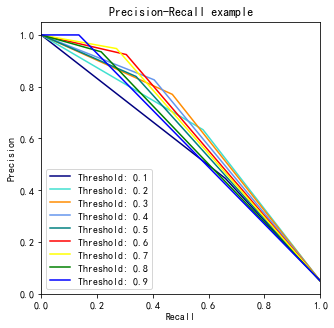

In [48]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve

#df_test_predictions = xgb.predict(df_test[predictors])
df_test_predprob = xgb.predict_proba(df_test[predictors])

thresholds = np.arange(1,10)/10.0
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = df_test_predprob[:,1] > i
    
    #print "Threshold: ",i,", F1 score:", f1_score(df_test[target],y_test_predictions_prob)
    
    precision, recall, thresholds = precision_recall_curve(df_test[target],y_test_predictions_prob)
    print "Threshold: ",i,", F1 score:", 2*precision*recall/(precision+recall)
    print precision, recall, thresholds
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend()

## Confusion Matrix

Threhold >= 0.1,  F1 score:  0.532258064516
Threhold >= 0.2,  F1 score:  0.605744125326
Threhold >= 0.3,  F1 score:  0.583850931677
Threhold >= 0.4,  F1 score:  0.543624161074
Threhold >= 0.5,  F1 score:  0.483985765125
Threhold >= 0.6,  F1 score:  0.458646616541
Threhold >= 0.7,  F1 score:  0.420233463035
Threhold >= 0.8,  F1 score:  0.349593495935
Threhold >= 0.9,  F1 score:  0.237885462555


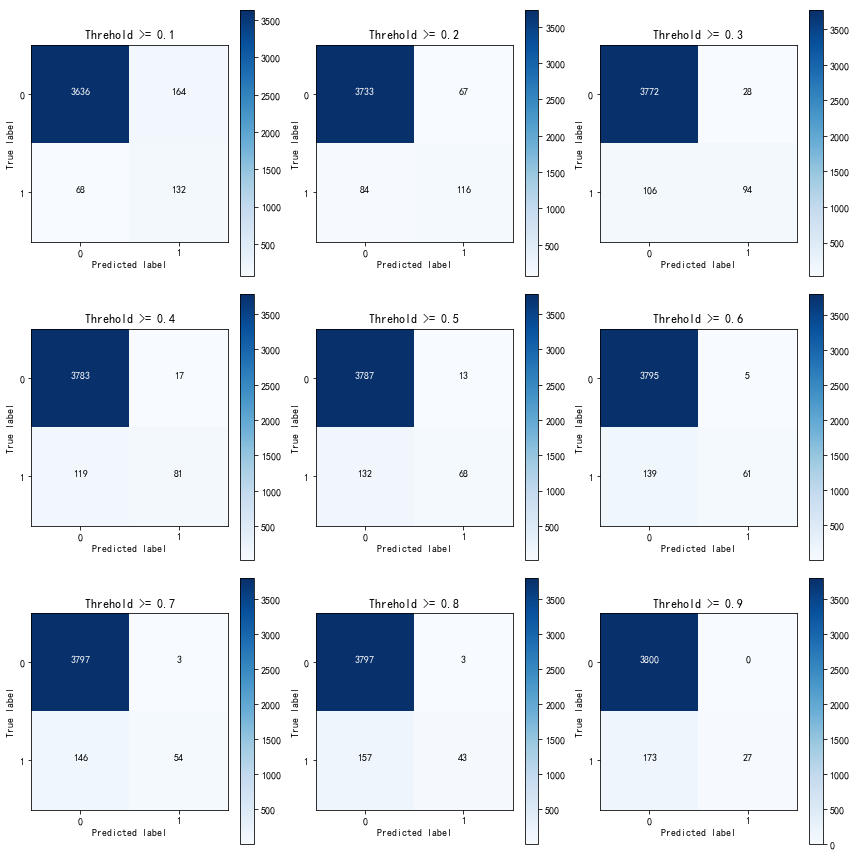

In [49]:
thresholds = np.arange(1,10)/10.0
plt.figure(figsize=(12,12))
j  = 1
for i in thresholds:
    y_test_predictions_high_recall = df_test_predprob[:,1] > i
    plt.subplot(3,3,j)
    j += 1
    
    # compute confusion matrix
    cnf_matrix = confusion_matrix(df_test[target], y_test_predictions_high_recall)
    #print "Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[0,1]+cnf_matrix[1,1])
    print "Threhold >= %s, "%i,"F1 score: ", metrics.f1_score(df_test[target], y_test_predictions_high_recall)
    
    # plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix,classes=class_names,title='Threhold >= %s'%i)

## Threshold CV for F1 Score

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

def threshold_search(estimator,thresholds,train,kf=5,random_state=27,stratify=False):
    cv_result = [] 
    
    if stratify:
        kf = StratifiedKFold(n_splits=kf,random_state=random_state)
    else:
        kf = KFold(n_splits=kf,random_state=random_state)
        
    for threshold in thresholds:
        score = []
        for idx_train,idx_test in kf.split(train[predictors].values,train[target].values):  # 划分k折
            estimator.fit(train[predictors].values[idx_train,:],train[target].values[idx_train])  # 这里predictors,target，作为全局参数
            #pred = estimator.predict(train[predictors].values[idx_test,:])
            predprob = estimator.predict_proba(train[predictors].values[idx_test,:])
            pred = predprob[:,1] >= threshold
            score.append(metrics.f1_score(train[target].values[idx_test],pred))  # f1 score
        cv_result.append([np.array(score).mean(),np.array(score).std(),threshold])
    return sorted(cv_result,reverse=True)

In [55]:
# Best model with threshold = 0.5
thresholds = [0.17,0.18]

xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=872,
 max_depth=8,
 min_child_weight=2,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

cv_result = threshold_search(xgb,thresholds,df_train,kf=5,random_state=27,stratify=False)

In [56]:
best_threshold = cv_result[0][-1]
cv_result   # [0.48692599096168082, 0.0082032694157471928, 0.15]
            # [0.49062021225829094, 0.0082035229949767238, 0.16]

[[0.48906596870909153, 0.01064908676639861, 0.17],
 [0.48404899659186251, 0.0098264116966037245, 0.18]]

In [11]:
xgb = XGBClassifier(
 learning_rate =0.005,
 n_estimators=1550,
 max_depth=8,
 min_child_weight=2,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(df_train[predictors],df_train[target])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.1, learning_rate=0.005, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=1550, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [20]:
# predict on testing data:
#df_test_predictions = xgb.predict(df_test[predictors])
df_test_predprob = xgb.predict_proba(df_test[predictors])[:,1]
df_test_predictions = df_test_predprob>= 0.21

print "Accuracy : %.4g" % metrics.accuracy_score(df_test[target], df_test_predictions)
print "F1 Score : %f" % metrics.f1_score(df_test[target],df_test_predictions)
print 'AUC Score (Test): %f' % metrics.roc_auc_score(df_test[target], df_test_predprob)
print "Classification Report : \n", metrics.classification_report(df_test[target],df_test_predictions)

Accuracy : 0.9637
F1 Score : 0.611260
AUC Score (Test): 0.925714
Classification Report : 
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      3800
          1       0.66      0.57      0.61       200

avg / total       0.96      0.96      0.96      4000



## Opimal Models

发现当scal_pos_weight=1时，f1最值对于threshold非常敏感，可保留到小数点后3位。  
也许设置scal_pos_weight>1,会降低f1对threshold的敏感性？  

**基于新的（稀疏特征被丢弃）未处理的特征数据（std==0未处理）**  
- **（1）scale_pos_weight=1；新的未处理的特征数据（std==0未处理）[完成]**   
    - **模型参数1**  - f1_score：0.567442  
params = dict(learning_rate =0.1, n_estimators=60, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.16
    - **模型参数2**  
params = dict(learning_rate =0.01, n_estimators=725, max_depth=7, min_child_weight=1,gamma=0,subsample=0.9, colsample_bytree=0.9, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.15
- **（2）scale_pos_weight=1；特征数据清洗（std==0删除）[完成]** 
    - **模型参数1**  - f1_score：0.583756  
XGBClassifier(learning_rate =0.1, n_estimators=97, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.17  

    - **模型参数2**   -f1_score：0.584270；  调节threshold能达到0.5892  
XGBClassifier(learning_rate =0.01, n_estimators=872, max_depth=8, min_child_weight=2, gamma=0.1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)  
threhold = 0.16  
n_estimators=1550, learning_rate=0.005, threhold=0.21，f1_score=0.61
- **（3）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征**   
今天实验！！

- **（4）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征-最不重要的特征（出现一二次）** 
- **（5）scale_pos_weight=1；特征数据清洗（std==0删除）+额外构造的fee特征+稀疏特征** 

  

**试验方案：** first_time，last_time都去掉,这两个特征毫无逻辑？？  
但last_time似乎还很重要？why？？也许绝大多数正常者，不常去医院，亦或者年底比较好fraud？还是先保留last_time  
删除first_time是因为在测试数据集中first_time都在年中开始！数据分布不一致！！  

（1）scale_pos_weight=1；新的未处理的特征数据（std==0）[完成]  
（3）scale_pos_weight=1；去除std==0特征数据  
（5）scale_pos_weight=1；去除不重要特征，如first_time等（去除只出现一次的特征）  

（2）scale_pos_weight=3；新的未处理的特征数据（std==0）    
（4）scale_pos_weight=3；去除std==0特征数据   
（6）scale_pos_weight=3；去除不重要特征，如first_time等（去除只出现一次的特征）   

# Drop Unimportant Features

In [40]:
feat_imp[feat_imp<=2]

every_q2_period       2
治疗费申报金额_q2            2
医用材料费自费金额_max         2
every_period_9        2
药品费发生金额_q1            2
every_period_23       2
every_period_17       2
every_period_16       2
every_period_15       2
every_period_0        2
补助审批金额_q3             2
贵重检查费金额_max           2
dayofweek_5           2
贵重检查费金额_sum           2
治疗费发生金额_q2            2
治疗费发生金额_q1            2
医疗救助医院申请_std          2
三目统计项目_max            2
中草药费发生金额_q3           2
医疗救助医院申请_max          2
医用材料费自费金额_sum         2
医用材料费自费金额_std         2
医用材料费自费金额_mean        2
贵重检查费金额_mean          1
every_period_10       1
贵重药品发生金额_q3           1
补助审批金额_max            1
补助审批金额_mean           1
补助审批金额_q1             1
公务员医疗补助基金支付金额_q2      1
                     ..
医用材料发生金额_q2           1
医疗救助个人按比例负担金额_mean    1
医用材料发生金额_q3           1
every_period_18       1
贵重检查费金额_std           1
补助审批金额_std            1
医用材料发生金额_q1           1
中草药费发生金额_q2           1
民政救助补助金额_sum          1
民政救助补助金额_q2           1
床位费发生金额_std     

In [15]:
feat_droped = feat_imp[feat_imp<=2].reset_index()['index'].str.encode('utf-8')

In [16]:
df_train_test_new = df_train_test.drop(feat_droped,axis=1)

In [17]:
df_train_test_new.to_csv('df_data_feaure_dropped.csv')